In [1]:
import os
import pandas as pd
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms,utils
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class FaceDataset(Dataset):
    def __init__(self, csv_file, txt_file, root_dir, transform=None):
        self.index = pd.read_csv(csv_file)
        self.labels = np.loadtxt(txt_file)[:,3]
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        
        img_name = os.path.join(self.root_dir, self.index.iloc[idx, 0])
        image = io.imread(img_name)
        image = image.astype('float')
        labels = self.labels[idx]
        labels = labels.astype('long').reshape(-1)
        sample = {'image':image, 'label':labels}
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample

class ToTensor(object):
    def __call__(self, sample):
        image, label = sample['image'], sample['label']
        image = np.transpose(image, (2, 0, 1))
        label = (label + 1) / 2
        return {'image':torch.FloatTensor(image),
                 'label':torch.LongTensor(label)}

In [3]:
transformed_dataset = FaceDataset(csv_file='img/label.csv', txt_file='img/labelss.txt',
                                  root_dir='img/', transform=transforms.Compose([
    ToTensor()
]))
train_size = 4500
test_size = 500
batch_size = 150
dataloader = DataLoader(transformed_dataset, batch_size=batch_size, shuffle=True)
train_dataset, test_dataset = torch.utils.data.random_split(transformed_dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_size, shuffle=False)

tensor([1])
(3, 218, 178)
(218, 178)


Text(0.5, 1.0, '[1]')

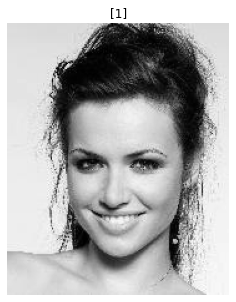

In [43]:
#check if the dictionary is correct
#print(transformed_dataset[0])
#print(transformed_dataset[1])
#print(transformed_dataset[2])
print(train_dataset[0]['label'])
#print(train_dataset[0]['image'])
Image = np.array(train_dataset[0]['image'])
Label = np.array(train_dataset[0]['label'])
print(Image.shape)
#to check if the label is corresponding to the image
plt.rcParams['figure.figsize'] = (5,5)
#img = Image
img = np.mean(Image, axis=0) / 255.
print(img.shape)
#dim_x, dim_y =Image.shape
#print("The images have dimensions:", dim_x, "x", dim_y)#图片长宽像素
#print("Total number of pixels:", dim_x*dim_y)
plt.imshow(img, cmap="gray")
#plt.imshow(img)
plt.axis("off")
plt.title(Label)